In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression,LogisticRegression,ElasticNet
from sklearn.model_selection import train_test_split


from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler_Norm = StandardScaler()
scaler_MinMax = MinMaxScaler()

In [63]:
def get_accuracy(X,y, model = 'linear',l1=0.5, get='score', random_state=7):
    if model == 'linear': reg = LinearRegression()
    elif model == 'logistic': reg = LogisticRegression()
    else: reg = ElasticNet(l1_ratio=l1)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state) 
    
    if model == 'logistic': 
        y_train, y_test = y_train.astype('int'), y_test.astype('int')
        X_train = scaler_Norm.fit_transform(X_train)
        X_test = scaler_Norm.transform(X_test)
    
    reg.fit(X_train, y_train)
    
    if get == 'score': return reg.score(X_test,y_test)
    else: return reg

In [3]:
def make_dummies(X,columns):
    dummy = pd.get_dummies(X,columns=columns)
    X_ = X.drop( columns=columns, axis=1 )
    return pd.concat( (X_, dummy), axis=1 )

### Загрузим Датафрейм

In [4]:
from sklearn.datasets import load_boston
df = pd.read_csv(load_boston()['filename'],skiprows=1)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Содержит информацию о жилье в Бостоне, собранную бюро переписи населения США. Она была получена из архива StatLib и широко использовалась в литературе для оценки алгоритмов.

    CRIM - уровень преступности на душу населения
    ZN - доля земли под жилую застройку,
    INDUS - доля акров, не относящихся к розничной торговле.
    CHAS - фиктивная переменная реки Чарльз (1, если участок ограничивает реку; 0 в противном случае)
    NOX - концентрация оксидов азота
    RM - среднее количество комнат в доме
    AGE - доля занимаемых владельцами единиц, построенных до 1940 г.
    DIS - взвешенное расстояние до пяти бостонских центров занятости
    RAD - индекс доступности радиальных автомобильных дорог
    TAX - полная ставка налога на имущество за 10 000 долларов США.
    PTRATIO - соотношение учеников и учителей по городам
    B - 1000 (Bk - 0,63) ^ 2, где Bk - доля афроамериканцев по городам
    LSTAT - % более населения низкого соц статуса
    MEDV - Средняя стоимость домов в 1000 долларов



Проверим датасет

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Пропусков нет. Посмотрим какие из параметров ктегориные и запишем их в переменную categorical_columns

In [7]:
categorical_columns = [
    'CHAS', 'RAD' 
]

In [8]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [9]:
numeric_columns = [
    'CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX',
    'PTRATIO', 'B', 'LSTAT']    

проверим точность и какие параметры как влияют.  

In [65]:
get_accuracy(df.drop(columns=categorical_columns, axis=0)[numeric_columns],df.MEDV)

0.5909014656167102

In [11]:
reg = get_accuracy(df.drop(columns=categorical_columns, axis=0)[numeric_columns],df.MEDV, get='reg')
list(zip(reg.coef_,numeric_columns)) , reg.intercept_

([(-0.089966421487264, 'CRIM'),
  (0.02452022443976262, 'ZN'),
  (-0.022095491800454423, 'INDUS'),
  (-13.424930611252643, 'NOX'),
  (5.609896374962728, 'RM'),
  (-0.012265457354141675, 'AGE'),
  (-1.3640618328502154, 'DIS'),
  (-0.0004513889969098295, 'TAX'),
  (-0.9154641492506411, 'PTRATIO'),
  (0.010046423081978378, 'B'),
  (-0.37576600408439664, 'LSTAT')],
 19.30103535039134)

In [66]:
get_accuracy(df.drop(columns=categorical_columns, axis=0)[numeric_columns],df.MEDV ,model='elastic',l1=.5)

0.6575142572434773

В принципе, регуляция дала дополнительные 5% к точности, посмотрим на коэффициенты. 

In [67]:
reg = get_accuracy(df.drop(columns=categorical_columns, axis=0)[numeric_columns],df.MEDV ,model='elastic',l1=1,get='reg') 
list(zip(reg.coef_,numeric_columns)) , reg.intercept_

([(-0.02575662654513913, 'CRIM'),
  (0.03038618717927922, 'ZN'),
  (-0.006510795641656716, 'INDUS'),
  (-0.0, 'NOX'),
  (2.399132678174598, 'RM'),
  (0.020474268882509986, 'AGE'),
  (-0.48500786825027575, 'DIS'),
  (-0.005136947820037958, 'TAX'),
  (-0.6605862704562907, 'PTRATIO'),
  (0.007158598838868424, 'B'),
  (-0.6562224098124108, 'LSTAT')],
 27.820342509117005)

Модель выбросила NOX, INDUS, TAX, B.  
Уберем эти параметры из сравнения и посмотрим результат.

In [73]:
dissmiss_columns = ['NOX', 'INDUS', 'TAX', 'B'] + ['MEDV']
df_updated = df.drop(columns=dissmiss_columns, axis=1)
df_updated.columns

Index(['CRIM', 'ZN', 'CHAS', 'RM', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'LSTAT'], dtype='object')

In [74]:
for i in np.arange(0.1,1.1,.1):
    print(i ,get_accuracy(df.drop(columns=categorical_columns, axis=0)[numeric_columns],df.MEDV ,model='elastic',l1=i) )

0.1 0.6613710589379292
0.2 0.6605891095290726
0.30000000000000004 0.6597013492508093
0.4 0.6586866723681436
0.5 0.6575142572434773
0.6 0.6561358800689291
0.7000000000000001 0.6544670522010798
0.8 0.6523265384564196
0.9 0.6492938482170356
1.0 0.6438651287078576


In [75]:
get_accuracy(df.drop(columns=categorical_columns, axis=0)[numeric_columns],df.MEDV ,model='elastic',l1=0.1)

0.6613710589379292

Таким не сложным действием мы улучшили результат с 0.59090 до 0.66137  


Добавим качественные признаки: 

In [76]:
get_accuracy( pd.get_dummies(df_updated, columns=['RAD']).drop(columns=categorical_columns,axis=1,errors='ignore') ,\
             df.MEDV)

0.5863661195358532

In [77]:
get_accuracy( pd.get_dummies(df_updated, columns=['RAD']).drop(columns=categorical_columns,axis=1,errors='ignore') ,\
             df.MEDV, model='elastic',l1=.1)

0.6546588460436955

In [78]:
df_updated = pd.get_dummies(df_updated, columns=['RAD'])

Категорийый признак 'RAD' - расстояние о ближайших автострад улучшил предсказательность модели.  
Добавим категорийный признак 'CHAS'.

In [80]:
get_accuracy( pd.get_dummies(df_updated, columns=['CHAS']).drop(columns=categorical_columns,axis=1,errors='ignore') ,\
             df.MEDV, model='elastic',l1=.1 )

0.6551860681207755

In [81]:
df_updated = pd.get_dummies(df_updated, columns=['CHAS'])

In [82]:
reg = get_accuracy( df_updated , df.MEDV, get='reg', model='elastic',l1=.1 )
list(zip(reg.coef_,df_updated.columns))

[(-0.08303675974174597, 'CRIM'),
 (0.03970918565421537, 'ZN'),
 (1.2554628428026176, 'RM'),
 (0.021412416627802685, 'AGE'),
 (-0.5826083515485245, 'DIS'),
 (-0.8210312930316431, 'PTRATIO'),
 (-0.782722702225597, 'LSTAT'),
 (-0.04056092700616296, 'RAD_1'),
 (-0.0, 'RAD_2'),
 (0.14362497915957284, 'RAD_3'),
 (-0.0, 'RAD_4'),
 (-0.0, 'RAD_5'),
 (-0.005464880567421219, 'RAD_6'),
 (0.0, 'RAD_7'),
 (0.053558633214874626, 'RAD_8'),
 (-0.0, 'RAD_24'),
 (-0.14929544000124154, 'CHAS_0'),
 (0.14929551629246207, 'CHAS_1')]

Близость до реки 'Charles' тоже оказало положительное влияние на предсказательность модели

<AxesSubplot:>

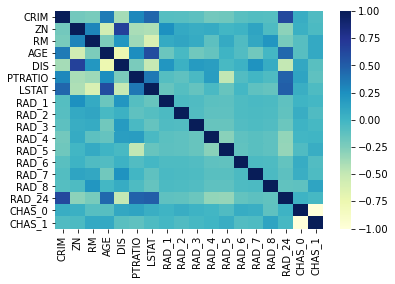

In [83]:
# Провери коллинеарность признаков:
sns.heatmap(data=df_updated.corr(), cmap='YlGnBu')

<AxesSubplot:>

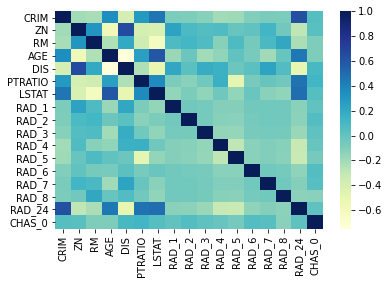

In [86]:
# Провери коллинеарность признаков:
sns.heatmap(data=df_updated.corr(), cmap='YlGnBu')

CHAS имеет всего два значения(биноминальный признак) и соответственно при 'get_dummies' - создало два противоположных параметра. Дропнем один из них.

In [85]:
df_updated = df_updated.drop(columns=['CHAS_1'],axis=1)

In [87]:
get_accuracy( df_updated , df.MEDV, model='elastic',l1=.1 )

0.6549562704041318

In [23]:
reg = get_accuracy( df_updated , df.MEDV, get='reg', model='elastic',l1=.1 )
list(zip(reg.coef_,df_updated.columns))

[(-0.08932159060356987, 'CRIM'),
 (0.038957630906016505, 'ZN'),
 (1.2549652663413613, 'RM'),
 (0.0210541267420788, 'AGE'),
 (-0.5732725883139456, 'DIS'),
 (0.012773018997797139, 'RAD'),
 (-0.8342450021305048, 'PTRATIO'),
 (-0.7850340406847267, 'LSTAT'),
 (-0.1597821921223109, 'CHAS_0')]

### Итого предсказательность модели 65.5% 

На графике корреляций заметна жуткая корреляция между признаками: 
- 'AGE' и 'DIS'
- 'ZN' и 'DIS'
- 'CRIM' и 'LSTAT'

Попробуем что то с ними сделать

In [88]:
get_accuracy( df_updated.drop(columns=['AGE'],axis=1) , df.MEDV, model='elastic',l1=.1 )

0.660509784411415

In [94]:
get_accuracy( df_updated.drop(columns=['DIS'],axis=1) , df.MEDV, model='elastic',l1=.1 )

0.6237906682411929

In [92]:
get_accuracy( df_updated.drop(columns=['ZN'],axis=1) , df.MEDV, model='elastic',l1=.1 )

0.6408052736333323

In [93]:
get_accuracy( df_updated.drop(columns=['CRIM'],axis=1) , df.MEDV, model='elastic',l1=.1 )

0.6462905075458865

Если мы дропаем 'AGE' то предсказательность нашей модели увеличивается, так как 'AGE' был очень сильно скоррелирован с  'DIS'

In [95]:
df_updated =  df_updated.drop(columns=['AGE'],axis=1)
get_accuracy( df_updated , df.MEDV, model='elastic',l1=.1 )

0.660509784411415

### Итого предсказательность модели 66.05% 

Неплохо для линейной регресии..